In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [ ]:
db=pd.read_csv('Car_sales.csv')
db.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


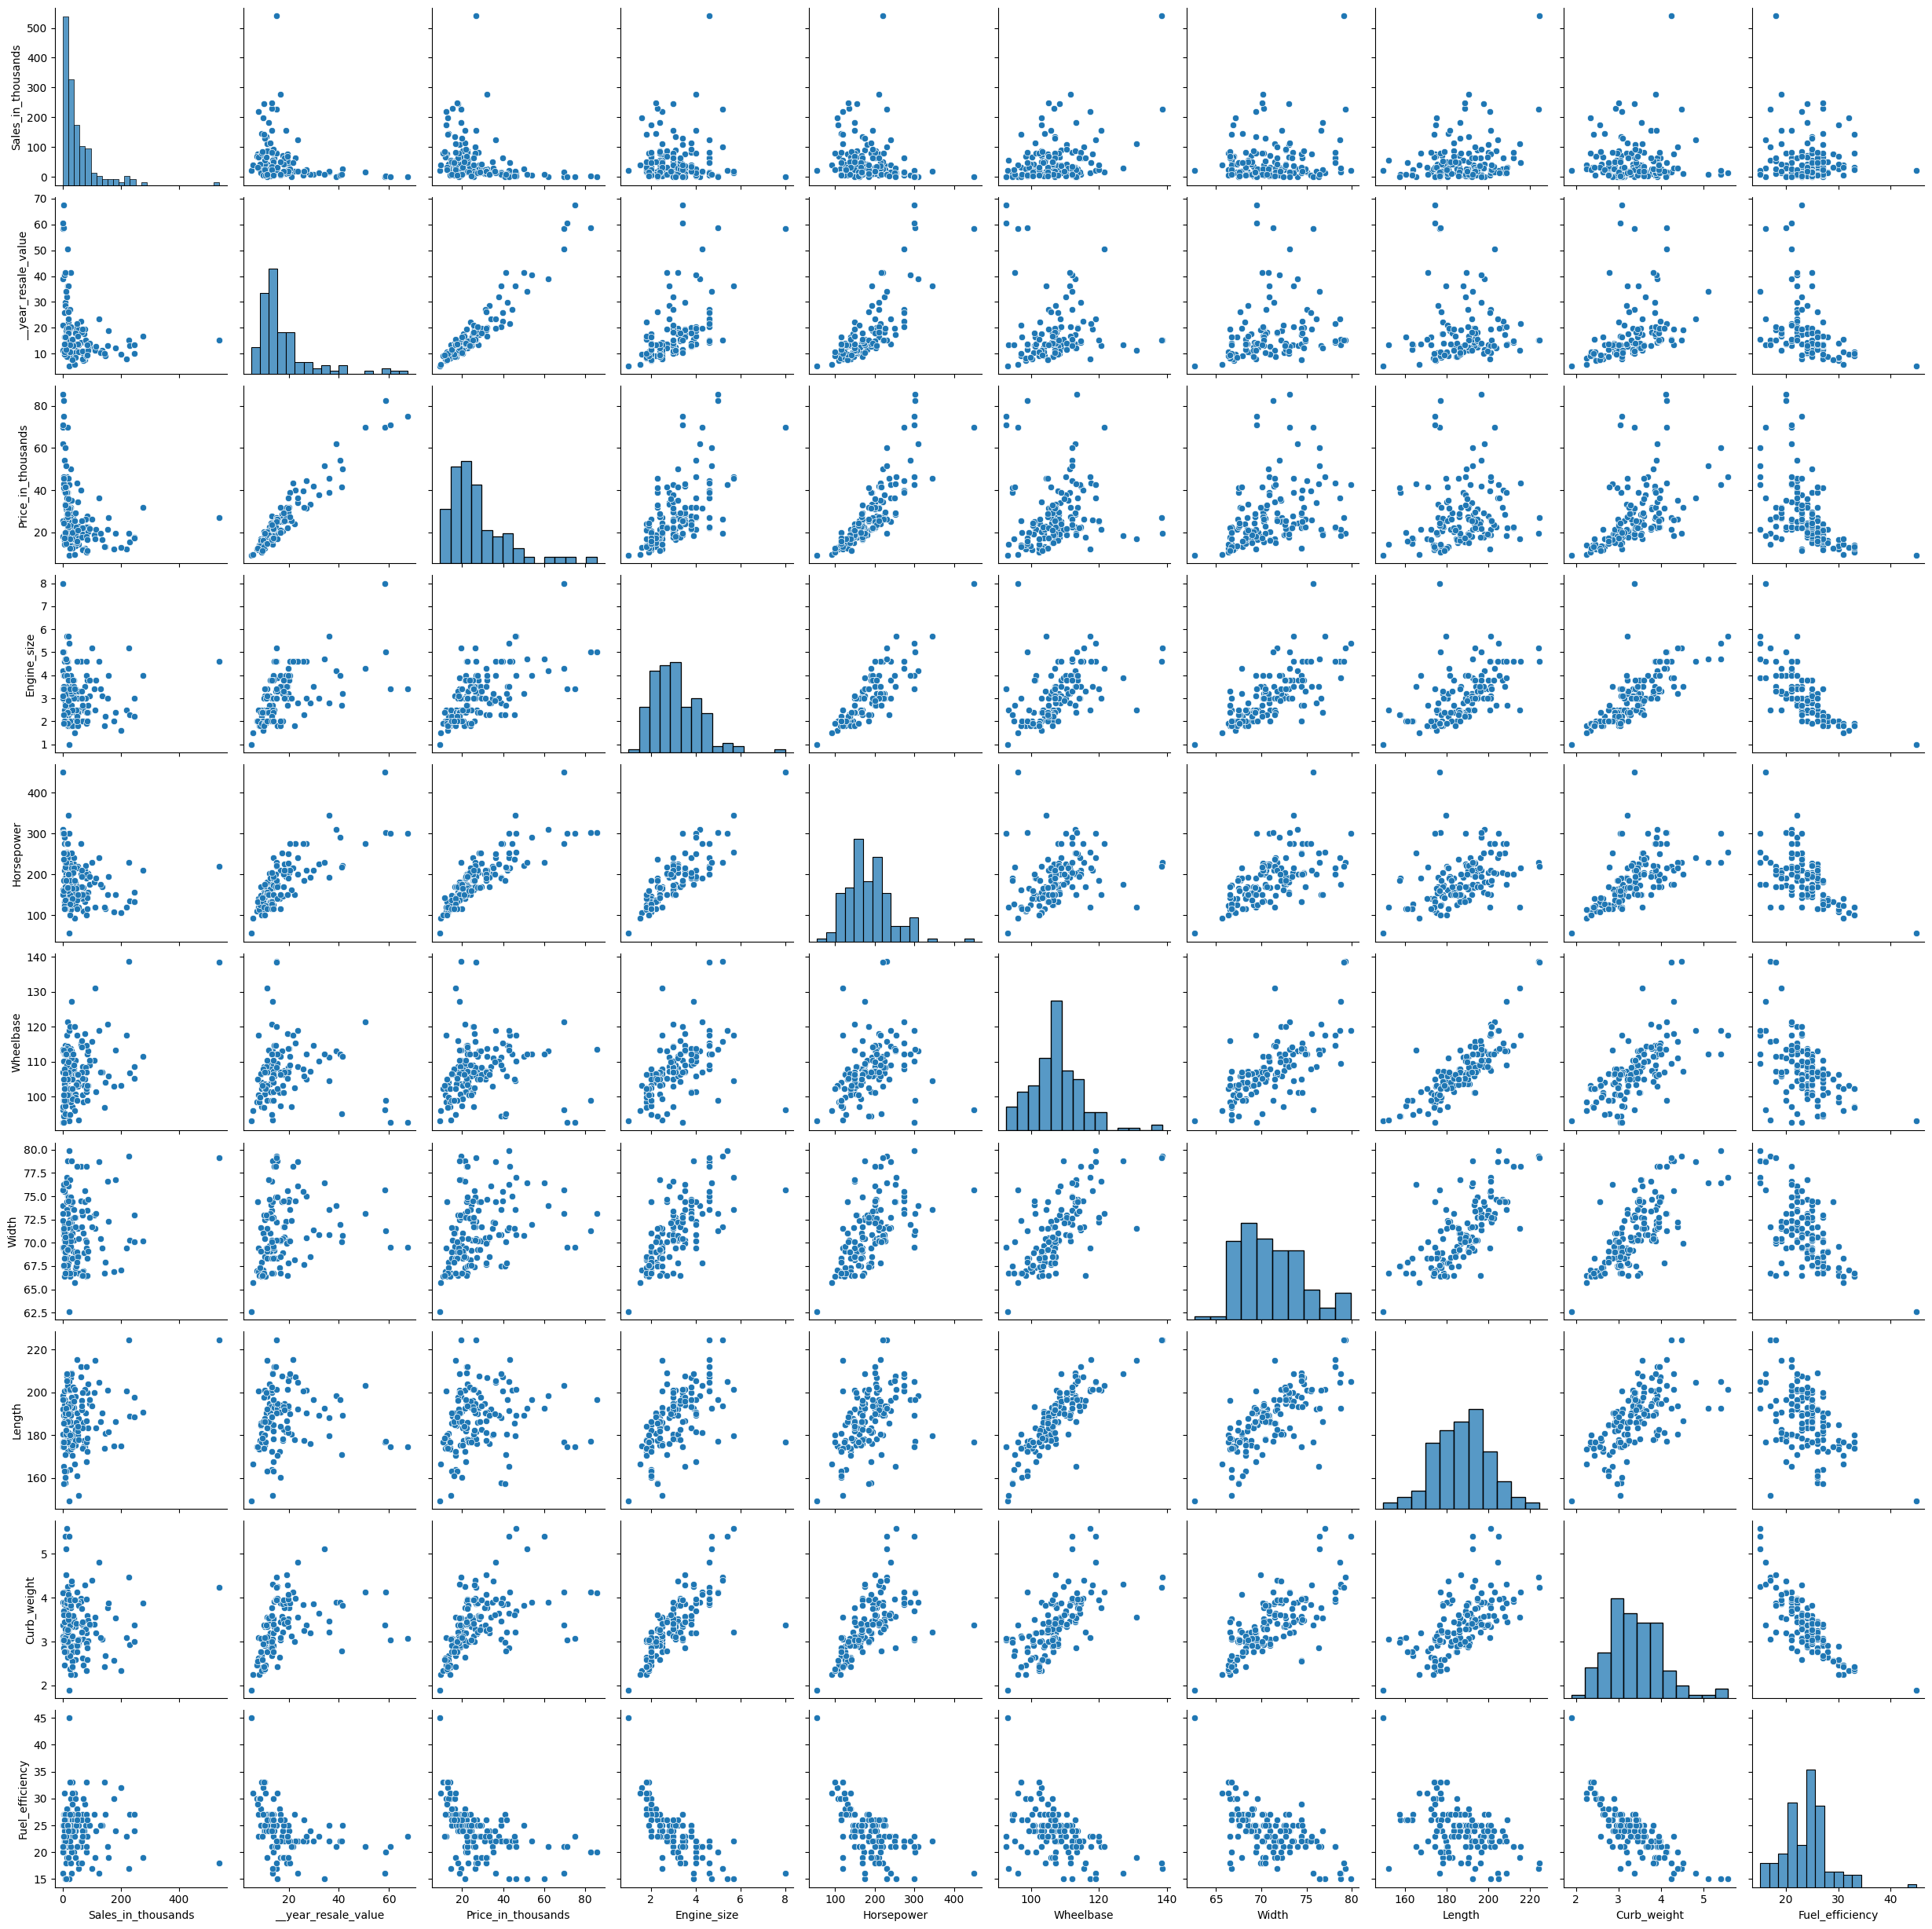

In [ ]:
car=db[['Sales_in_thousands','__year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_efficiency']]
sns.pairplot(car)

In [ ]:
freq = {}
for item in db.Manufacturer:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1
models=list(freq.values())
manu=list(freq.keys())

Text(0, 0.5, 'No. of models')

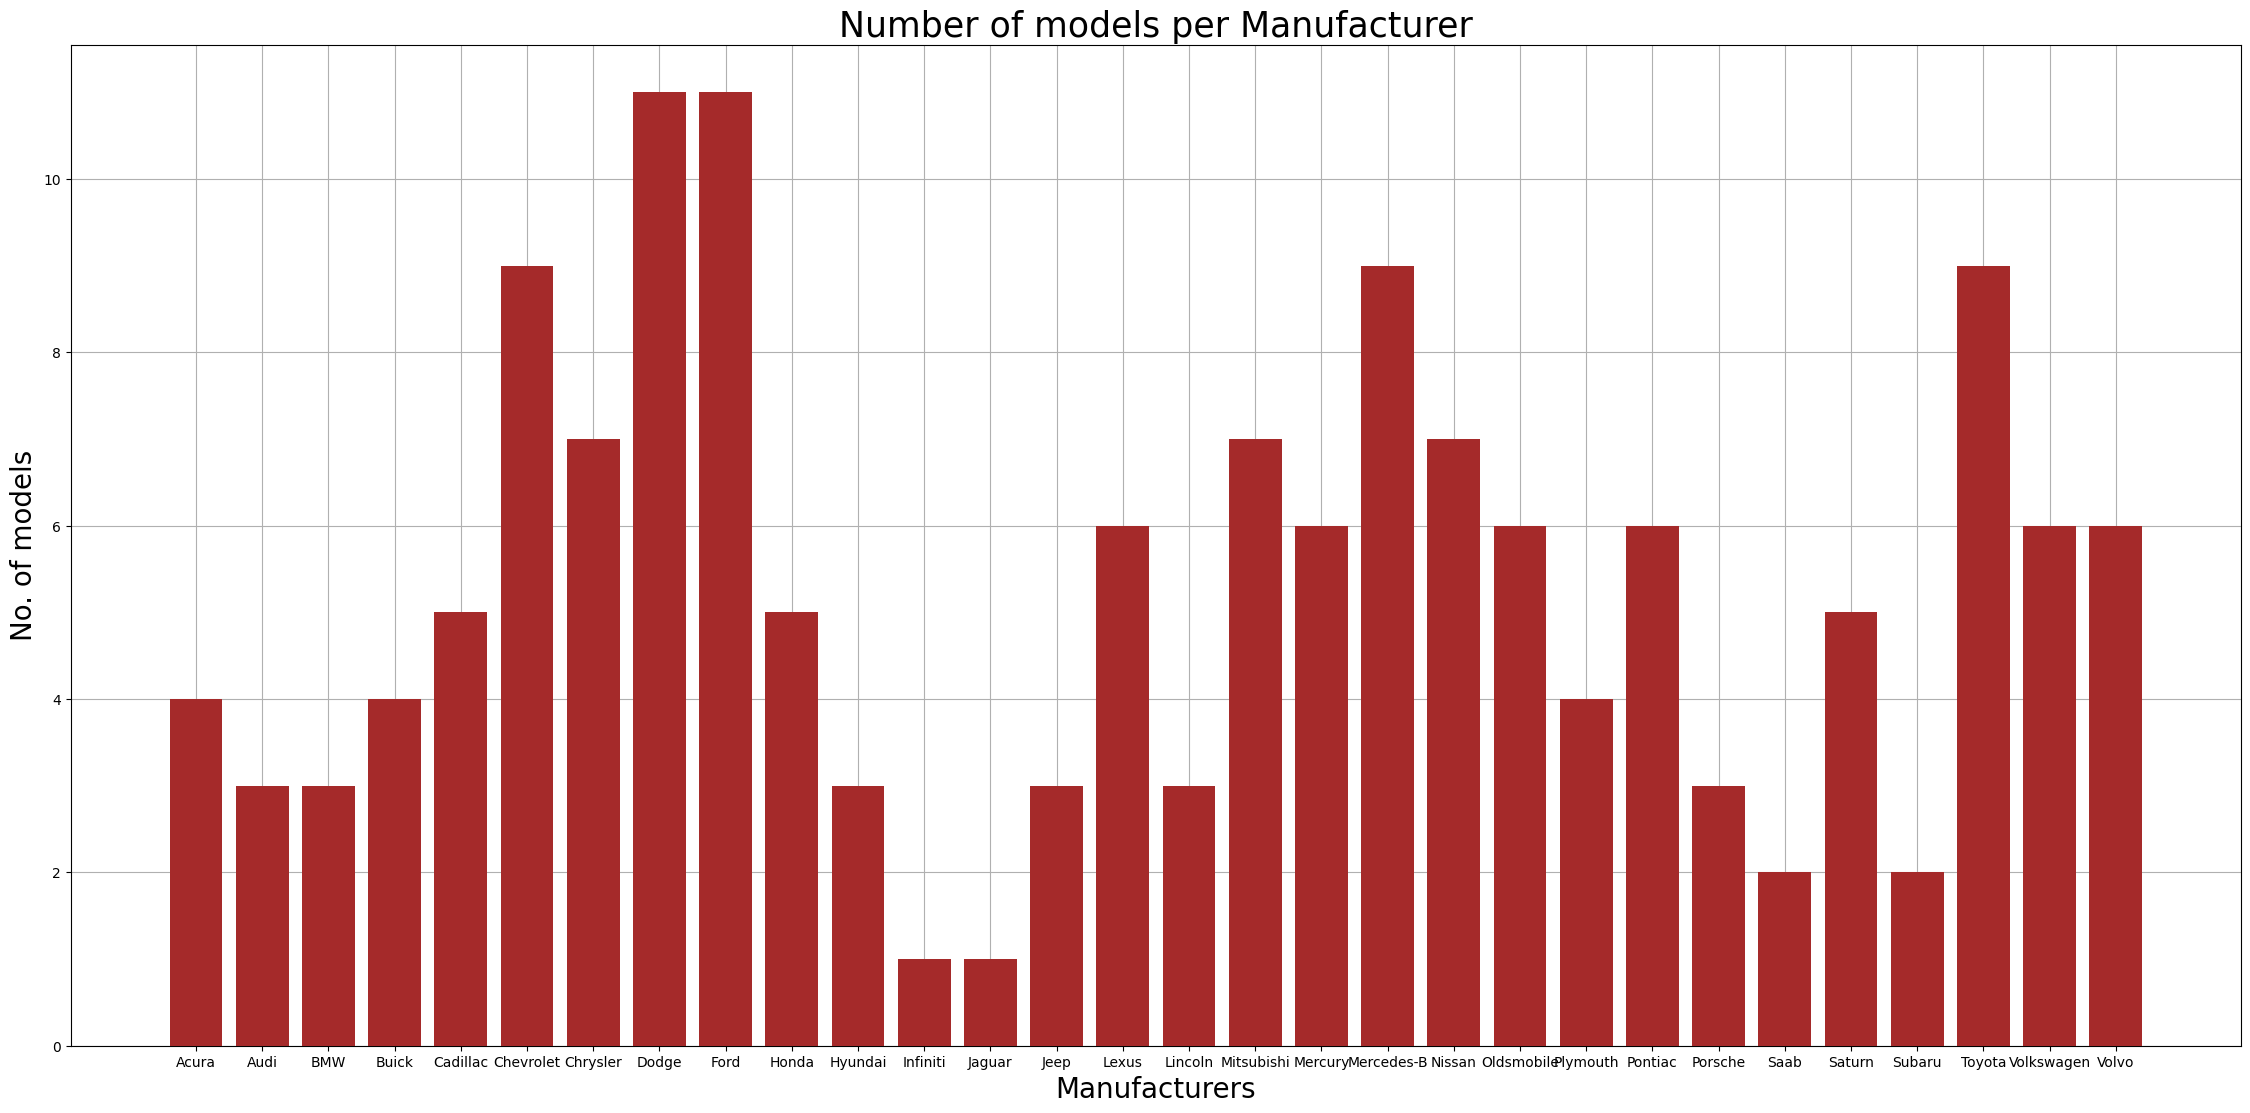

In [ ]:
plt.figure(figsize=(28,13))
plt.grid(zorder=0)
plt.bar(freq.keys(),freq.values(),color="brown",zorder=3)
plt.title("Number of models per Manufacturer",fontsize=25)
plt.xlabel("Manufacturers",fontsize=20)
plt.ylabel("No. of models",fontsize=20)

In [ ]:
freq.clear()
for index,row in db.iterrows():
  if (row['Manufacturer'] in freq):
    freq[row['Manufacturer']] += row['Sales_in_thousands']
  else:
    freq[row['Manufacturer']] = row['Sales_in_thousands']

sale=list(freq.values())
t=[]
for i in range(30):
  t.append(manu[i]+'<br>'+'Models: '+str(models[i])+'<br>'+'Sales: '+str(round(sale[i],2)))

In [ ]:
size = sale
fig = go.Figure(data=[go.Scatter(
    x=manu,
    y=models,
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(80.**2),
        sizemin=4,
        color="green"),
    name="Size of Bubble shows Total Sales of Manufacturer"
)])
fig.update_layout(
   title=dict(text="Sales per Manufacturer",x=0.5,font_size=20),
   xaxis_title="Manufacturer",
   yaxis_title="No. of Models",
   legend=dict(orientation="h"),
   font=dict(family="Arial", size=10)
)

fig.show()

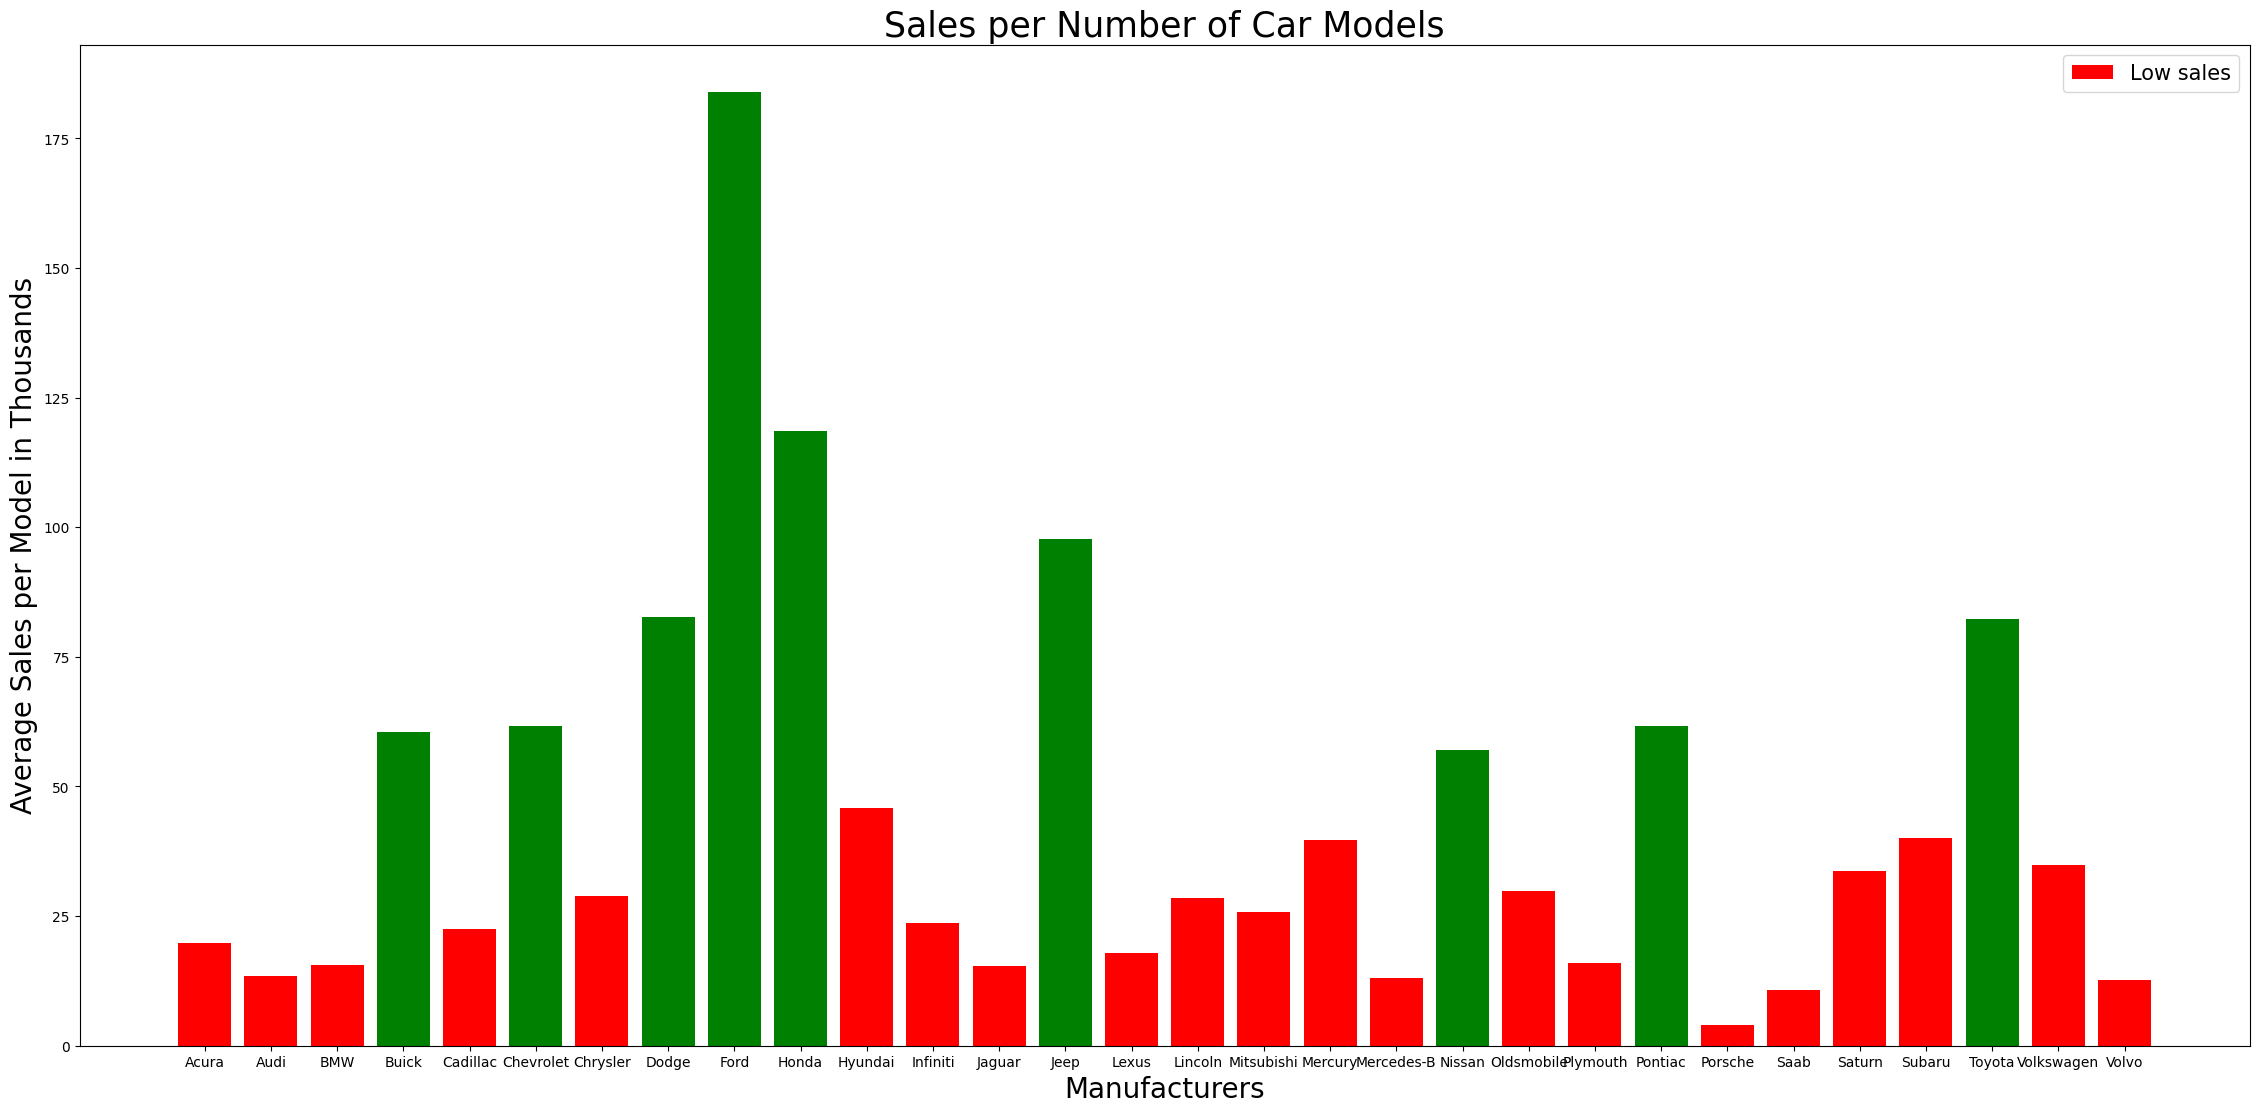

In [ ]:
spc = []
c = []
for i in range(30):
  spc.append(sale[i]/models[i])
  if(sale[i]/models[i] > 50):
    c.append("green")
  else:
    c.append("red")

plt.figure(figsize=(28,13))
plt.bar(manu,spc,color=c)
plt.title("Sales per Number of Car Models",fontsize=25)
plt.xlabel("Manufacturers",fontsize=20)
plt.ylabel("Average Sales per Model in Thousands",fontsize=20)
plt.legend(["Low sales","Above average sales"],fontsize=15,loc="upper right")

In [ ]:
data = db[(db['Fuel_efficiency'] > 0) & (db['Fuel_capacity'] > 0)]

m, b = np.polyfit(list(data['Fuel_efficiency']), list(data['Fuel_capacity']), 1)
y_fit = m * data['Fuel_efficiency'] + b
t=[]
c=[]
for index,row in data.iterrows():
  t.append(row['Manufacturer']+' '+row['Model'])
  if row['Fuel_capacity'] > m*row['Fuel_efficiency']+b+5:
    c.append('green')
  elif row['Fuel_capacity'] < m*row['Fuel_efficiency']+b-5:
    c.append('red')
  else:
    c.append('blue')

fig = go.Figure(data=[go.Scatter(
    x=list(data['Fuel_efficiency']),
    y=list(data['Fuel_capacity']),
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(color=c),
    name="Fuel Efficiency, Fuel Capacity"
)])

fig.add_trace(go.Scatter(
   x=list(data['Fuel_efficiency']),
   y=y_fit,
   name="Line of best fit"
))

fig.update_layout(
   title=dict(text="Fuel Efficiency v/s Fuel Capacity",x=0.5,font_size=20),
   xaxis_title="Fuel Efficiency",
   yaxis_title="Fuel Capacity",
   font=dict(family="Arial", size=10)
)
fig.show()

In [ ]:
for index,row in db.iterrows():
  if(row['Model']=='Prowler'):
    print(row)

Manufacturer             Plymouth
Model                     Prowler
Sales_in_thousands          1.872
__year_resale_value           NaN
Vehicle_type            Passenger
Price_in_thousands           43.0
Engine_size                   3.5
Horsepower                  253.0
Wheelbase                   113.3
Width                        76.3
Length                      165.4
Curb_weight                  2.85
Fuel_capacity                12.0
Fuel_efficiency              21.0
Latest_Launch           6/27/2012
Power_perf_factor      106.984456
Name: 117, dtype: object


In [ ]:
data = db[(db['Horsepower'] > 0) & (db['Price_in_thousands'] > 0)]

m, b = np.polyfit(list(data['Horsepower']), list(data['Price_in_thousands']), 1)
y_fit = m * data['Horsepower'] + b
t=[]
c=[]
for index,row in data.iterrows():
  t.append(row['Manufacturer']+' '+row['Model'])
  if row['Price_in_thousands'] > m*row['Horsepower']+b+20:
    c.append('green')
  elif row['Price_in_thousands'] < m*row['Horsepower']+b-20:
    c.append('red')
  else:
    c.append('blue')

fig = go.Figure(data=[go.Scatter(
    x=list(data['Horsepower']),
    y=list(data['Price_in_thousands']),
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(color=c),
    name="Horsepower, Price in thousands"
)])

fig.add_trace(go.Scatter(
   x=list(data['Horsepower']),
   y=y_fit,
   name="Line of best fit"
))

fig.update_layout(
   title=dict(text="Horsepower v/s Price",x=0.5,font_size=20),
   xaxis_title="Horsepower",
   yaxis_title="Price in thousands",
   font=dict(family="Arial", size=10)
)
fig.show()

In [ ]:
data = db[(db['Curb_weight'] > 0) & (db['Engine_size'] > 0)]

m, b = np.polyfit(list(data['Curb_weight']), list(data['Engine_size']), 1)
y_fit = m * data['Curb_weight'] + b
t=[]
c=[]
for index,row in data.iterrows():
  t.append(row['Manufacturer']+' '+row['Model'])
  if row['Engine_size'] > m*row['Curb_weight']+b+1.2:
    c.append('green')
  elif row['Engine_size'] < m*row['Curb_weight']+b-1.2:
    c.append('red')
  else:
    c.append('blue')

fig = go.Figure(data=[go.Scatter(
    x=list(data['Curb_weight']),
    y=list(data['Engine_size']),
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(color=c),
    name="Curb Weight, Engine Size"
)])

fig.add_trace(go.Scatter(
   x=list(data['Curb_weight']),
   y=y_fit,
   name="Line of best fit"
))

fig.update_layout(
   title=dict(text="Curb Weight v/s Engine Size",x=0.5,font_size=20),
   xaxis_title="Curb Weight",
   yaxis_title="Engine Size",
   font=dict(family="Arial", size=10)
)
fig.show()

In [ ]:
data = db[(db['Fuel_efficiency'] > 0) & (db['Curb_weight'] > 0)]

m, b = np.polyfit(list(data['Fuel_efficiency']), list(data['Curb_weight']), 1)
y_fit = m * data['Fuel_efficiency'] + b
t=[]
c=[]
for index,row in data.iterrows():
  t.append(row['Manufacturer']+' '+row['Model'])
  if row['Curb_weight'] > m*row['Fuel_efficiency']+b+1:
    c.append('green')
  elif row['Curb_weight'] < m*row['Fuel_efficiency']+b-1:
    c.append('red')
  else:
    c.append('blue')

fig = go.Figure(data=[go.Scatter(
    x=list(data['Fuel_efficiency']),
    y=list(data['Curb_weight']),
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(color=c),
    name="Fuel Efficiency, Curb Weight"
)])

fig.add_trace(go.Scatter(
   x=list(data['Fuel_efficiency']),
   y=y_fit,
   name="Line of best fit"
))

fig.update_layout(
   title=dict(text="Fuel Efficiency v/s Curb Weight",x=0.5,font_size=20),
   xaxis_title="Fuel Efficiency",
   yaxis_title="Curb Weight",
   font=dict(family="Arial", size=10)
)
fig.show()

In [ ]:
for index,row in db.iterrows():
  if(row['Model']=='Wrangler'):
    print(row)

Manufacturer                Jeep
Model                   Wrangler
Sales_in_thousands        55.557
__year_resale_value       13.475
Vehicle_type                 Car
Price_in_thousands         14.46
Engine_size                  2.5
Horsepower                 120.0
Wheelbase                   93.4
Width                       66.7
Length                     152.0
Curb_weight                3.045
Fuel_capacity               19.0
Fuel_efficiency             17.0
Latest_Launch           3/4/2012
Power_perf_factor      48.672898
Name: 67, dtype: object


In [ ]:
data = db[(db['Engine_size'] > 0) & (db['Horsepower'] > 0)]

m, b = np.polyfit(list(data['Engine_size']), list(data['Horsepower']), 1)
y_fit = m * data['Engine_size'] + b
t=[]
c=[]
for index,row in data.iterrows():
  t.append(row['Manufacturer']+' '+row['Model'])
  if row['Horsepower'] > m*row['Engine_size']+b+80:
    c.append('green')
  elif row['Horsepower'] < m*row['Engine_size']+b-80:
    c.append('red')
  else:
    c.append('blue')

fig = go.Figure(data=[go.Scatter(
    x=list(data['Engine_size']),
    y=list(data['Horsepower']),
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(color=c),
    name="Engine size, Horsepower"
)])

fig.add_trace(go.Scatter(
   x=list(data['Engine_size']),
   y=y_fit,
   name="Line of best fit"
))

fig.update_layout(
   title=dict(text="Engine Size v/s Horsepower",x=0.5,font_size=20),
   xaxis_title="Engine Size",
   yaxis_title="Horsepower",
   font=dict(family="Arial", size=10)
)
fig.show()

In [ ]:
data = db[(db['Price_in_thousands'] > 0) & (db['__year_resale_value'] > 0)]

m, b = np.polyfit(list(data['Price_in_thousands']), list(data['__year_resale_value']), 1)
y_fit = m * data['Price_in_thousands'] + b
t=[]
c=[]
for index,row in data.iterrows():
  t.append(row['Manufacturer']+' '+row['Model'])
  if row['__year_resale_value'] > m*row['Price_in_thousands']+b+10:
    c.append('green')
  elif row['__year_resale_value'] < m*row['Price_in_thousands']+b-10:
    c.append('red')
  else:
    c.append('blue')

fig = go.Figure(data=[go.Scatter(
    x=list(data['Price_in_thousands']),
    y=list(data['__year_resale_value']),
    text=t,
    showlegend=True,
    mode='markers',
    marker=dict(color=c),
    name="Price, Resale Value"
)])

fig.add_trace(go.Scatter(
   x=list(data['Price_in_thousands']),
   y=y_fit,
   name="Line of best fit"
))

fig.update_layout(
   title=dict(text="Price v/s Resale Value",x=0.5,font_size=20),
   xaxis_title="Price in thousands",
   yaxis_title="Resale Value",
   font=dict(family="Arial", size=10)
)
fig.show()

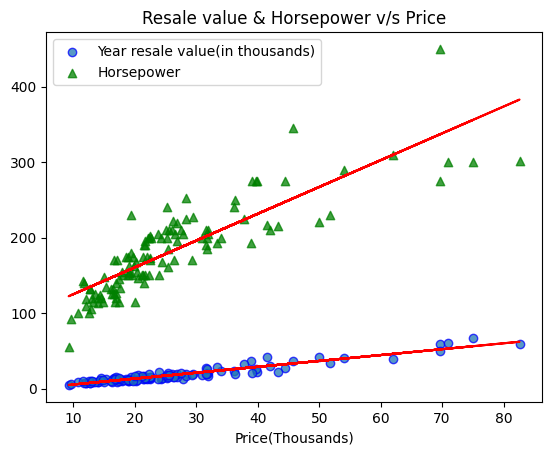

In [ ]:
data = db[(db['Price_in_thousands'] > 0) & (db['__year_resale_value'] > 0)]

x = data['Price_in_thousands']
y = data['__year_resale_value']
z = data['Horsepower']

m, b = np.polyfit(x, y, 1)
k, c = np.polyfit(x, z, 1)

fig, ax = plt.subplots()

ax.scatter(x, y, edgecolor='blue', linewidth=1, alpha=0.75)
ax.scatter(x, z, color='green', linewidth=1, alpha=0.75, marker='^')

ax.set_xlabel("Price(Thousands)")

y_fit = m * x + b
z_fit = k * x + c

ax.plot(x, y_fit, color='red')
ax.plot(x, z_fit, color='red')
ax.legend(["Year resale value(in thousands)","Horsepower"],loc="upper left")
plt.title("Resale value & Horsepower v/s Price")

plt.show()

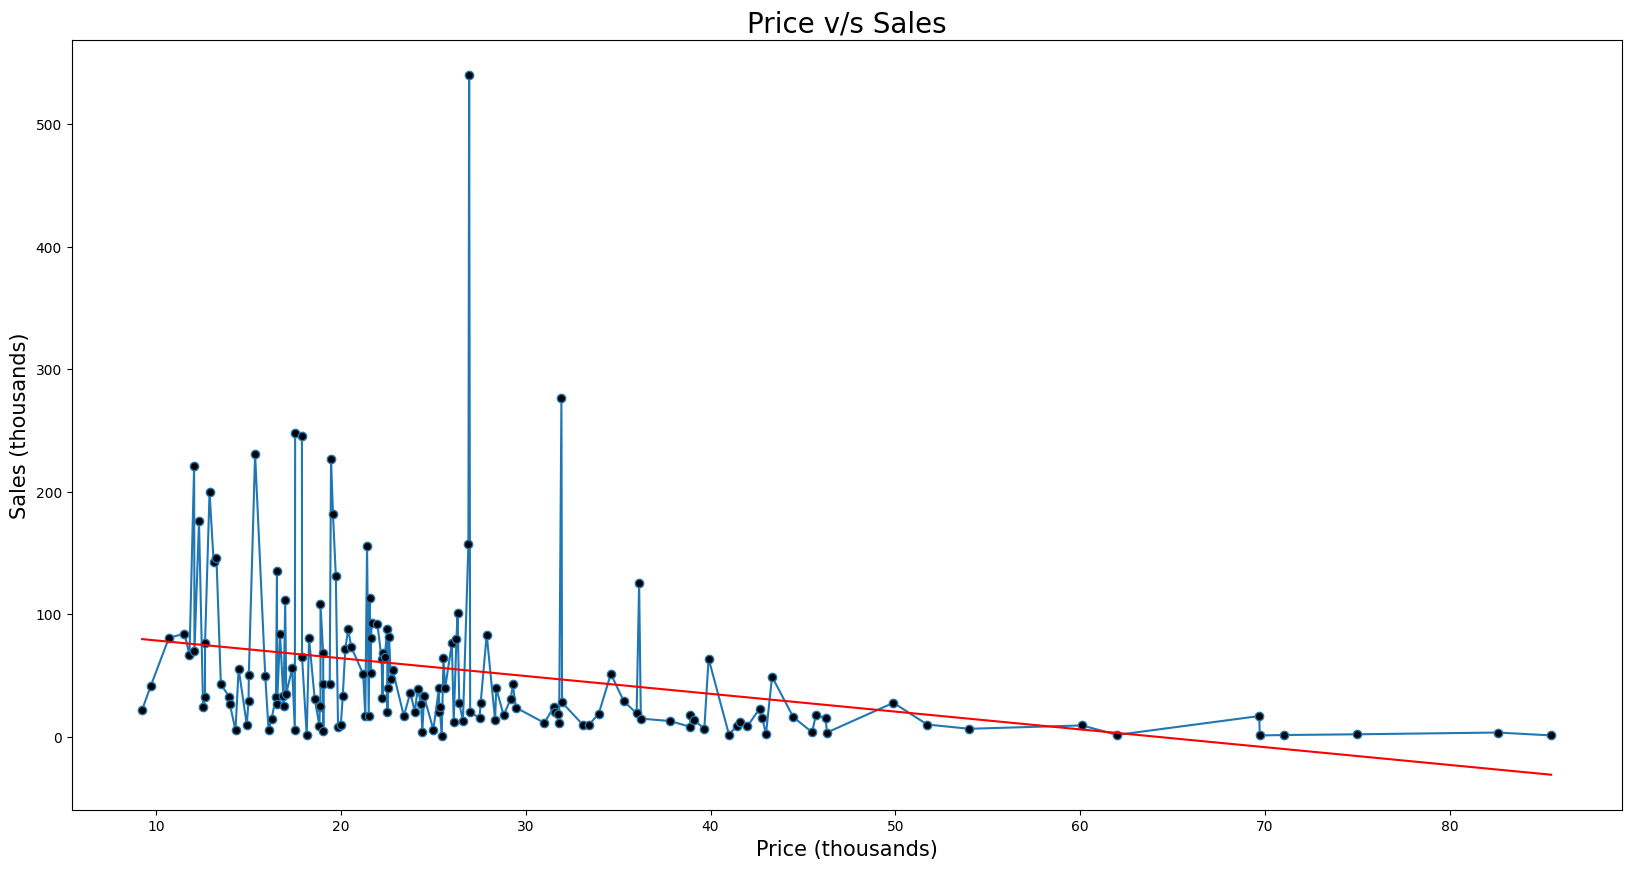

In [ ]:
p=list(db.Price_in_thousands)
s=list(db.Sales_in_thousands)
for i in range (len(p)):
  for j in range (len(p)-1):
    min=i
    if(p[min]<p[j]):
      min=j
    temp=p[i]
    p[i]=p[min]
    p[min]=temp
    temp=s[i]
    s[i]=s[min]
    s[min]=temp

pseries = np.array(p).astype(np.double)
sseries = np.array(s).astype(np.double)
s1mask = np.isfinite(pseries)

m, b = np.polyfit(pseries[s1mask], sseries[s1mask], 1)
y_fit = m * pseries[s1mask] + b

plt.figure(figsize=(20,10))
plt.plot(pseries[s1mask],sseries[s1mask], marker='o',mfc='black')
plt.title("Price v/s Sales",fontsize=20)
plt.xlabel("Price (thousands)",fontsize=15)
plt.ylabel("Sales (thousands)",fontsize=15)
plt.plot(pseries[s1mask], y_fit, color='red')

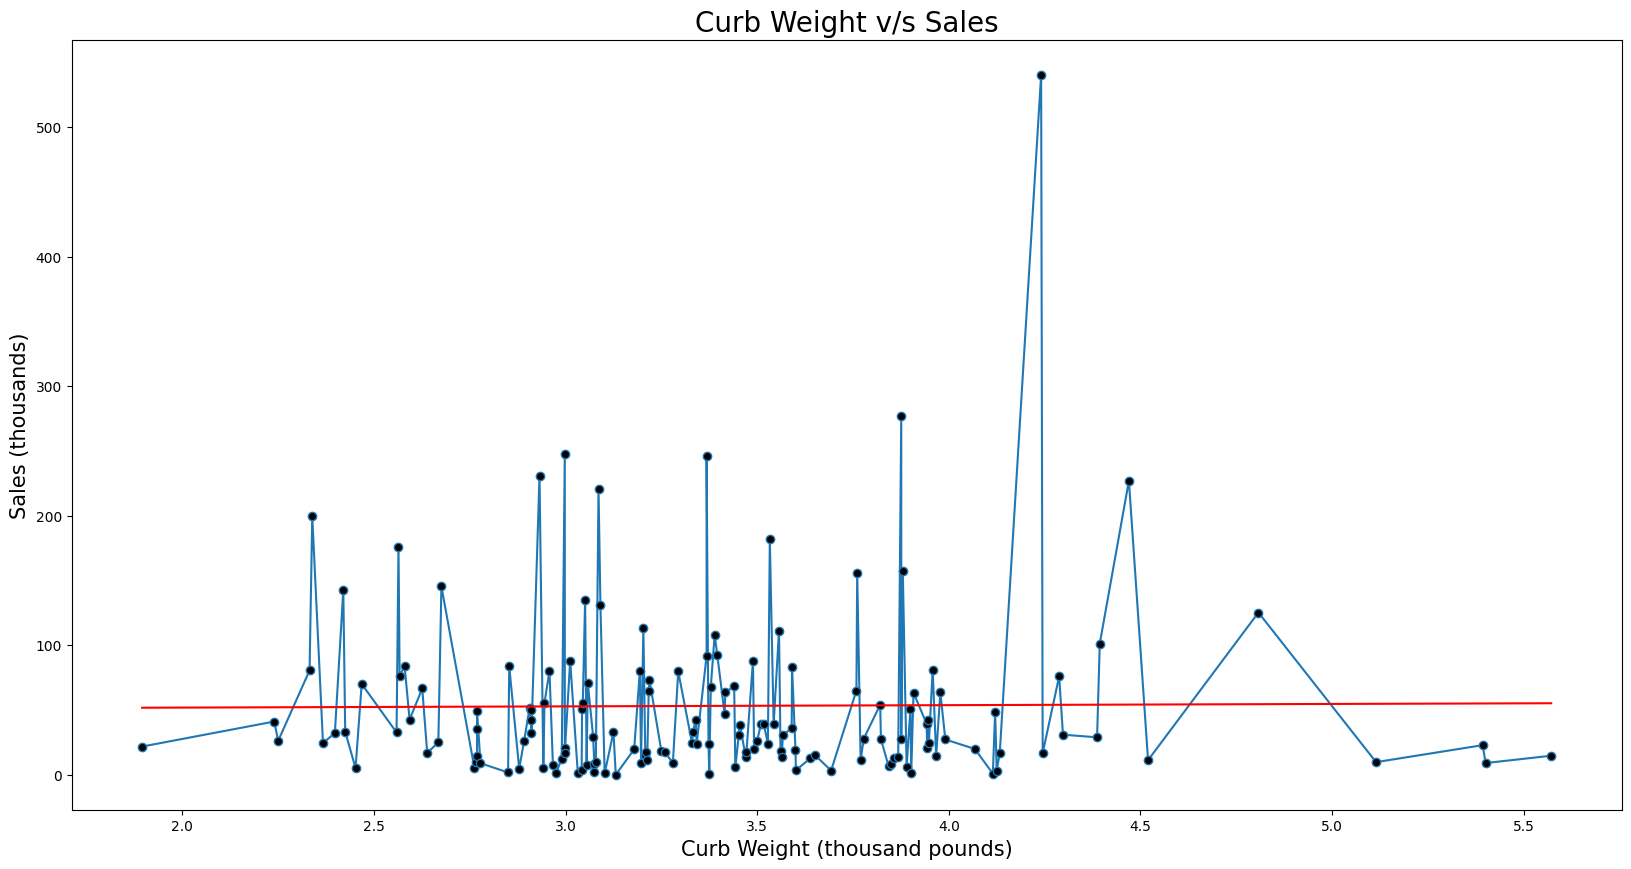

In [ ]:
s = list(db.Sales_in_thousands)
c = list(db.Curb_weight)

for i in range (len(c)):
  for j in range (len(c)-1):
    min=i
    if(c[min]<c[j]):
      min=j
    temp=c[i]
    c[i]=c[min]
    c[min]=temp
    temp=s[i]
    s[i]=s[min]
    s[min]=temp

cseries = np.array(c).astype(np.double)
sseries = np.array(s).astype(np.double)
s1mask = np.isfinite(cseries)

m, b = np.polyfit(cseries[s1mask], sseries[s1mask], 1)
y_fit = m * cseries[s1mask] + b

plt.figure(figsize=(20,10))
plt.plot(cseries[s1mask],sseries[s1mask], marker='o',mfc='black')
plt.title("Curb Weight v/s Sales", size=20)
plt.xlabel("Curb Weight (thousand pounds)",size=15)
plt.ylabel("Sales (thousands)",size=15)
plt.plot(cseries[s1mask], y_fit, color='red')

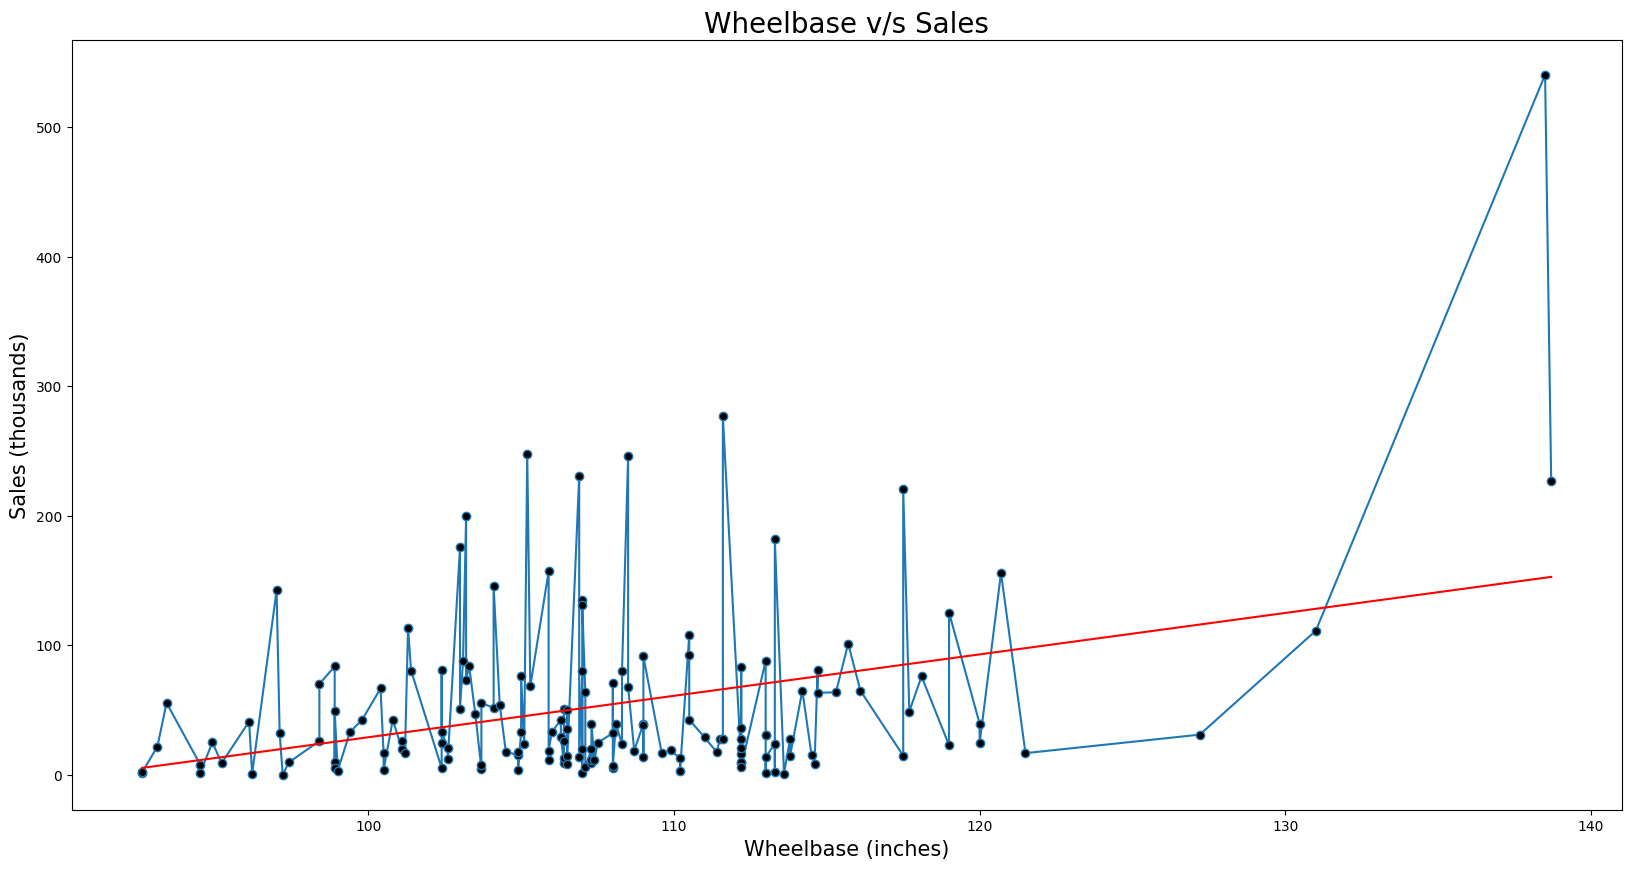

In [ ]:
s = list(db.Sales_in_thousands)
w = list(db.Wheelbase)

for i in range (len(w)):
  for j in range (len(w)-1):
    min=i
    if(w[min]<w[j]):
      min=j
    temp=w[i]
    w[i]=w[min]
    w[min]=temp
    temp=s[i]
    s[i]=s[min]
    s[min]=temp

wseries = np.array(w).astype(np.double)
sseries = np.array(s).astype(np.double)
s1mask = np.isfinite(wseries)

m, b = np.polyfit(wseries[s1mask], sseries[s1mask], 1)
y_fit = m * wseries[s1mask] + b

plt.figure(figsize=(20,10))
plt.title("Wheelbase v/s Sales", size=20)
plt.xlabel("Wheelbase (inches)",size=15)
plt.ylabel("Sales (thousands)",size=15)
plt.plot(wseries[s1mask],sseries[s1mask], marker='o',mfc='black')
plt.plot(wseries[s1mask], y_fit, color='red')

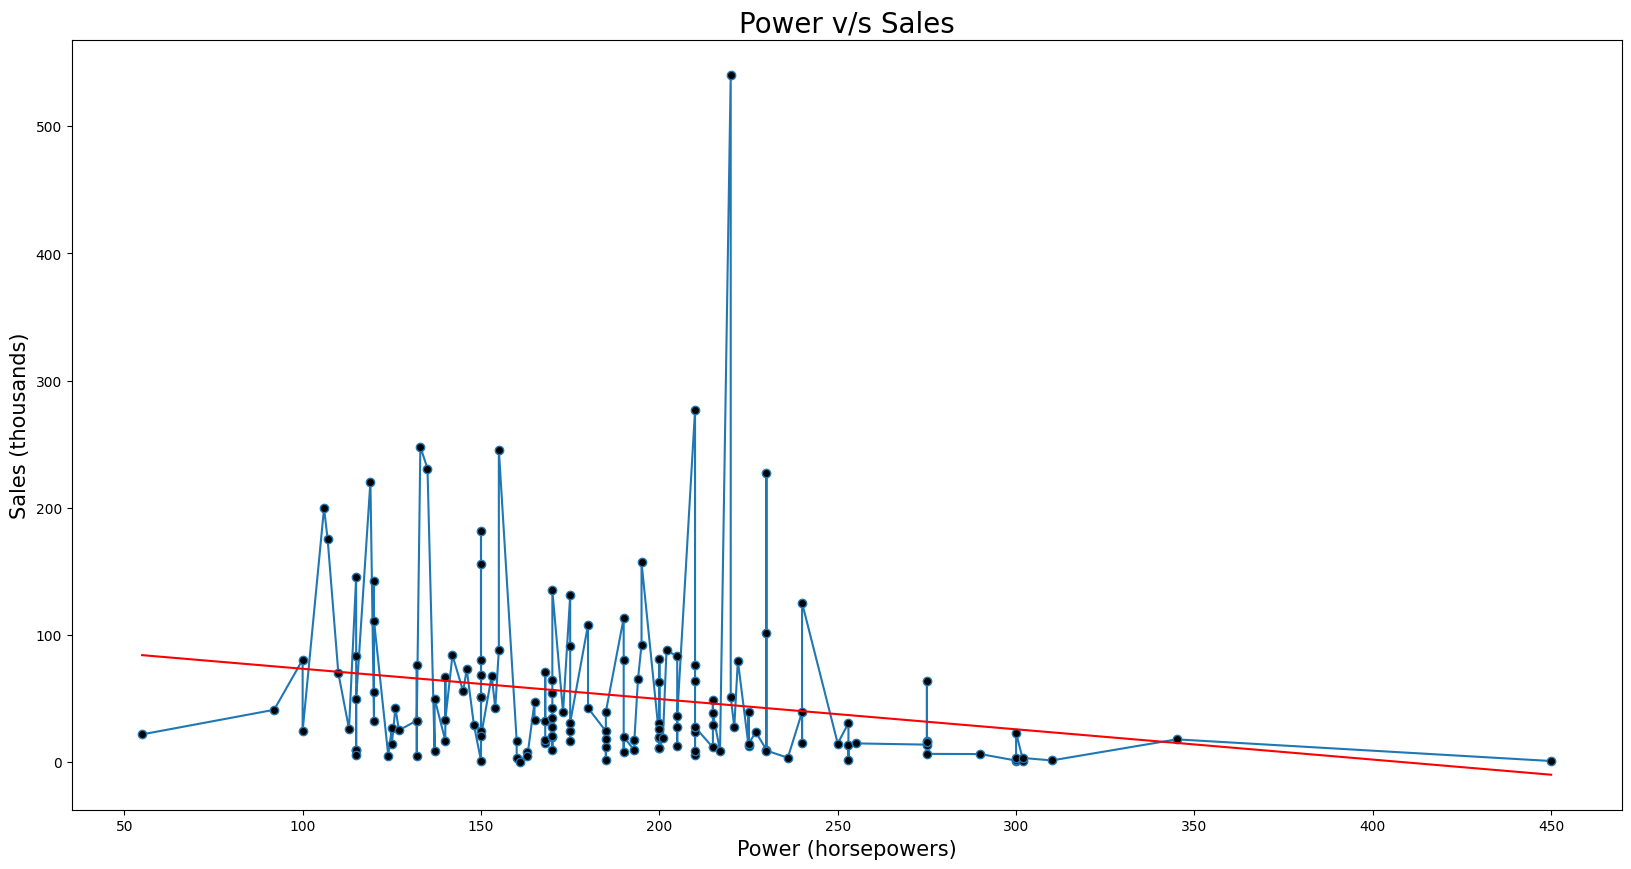

In [ ]:
s = list(db.Sales_in_thousands)
h = list(db.Horsepower)

for i in range (len(h)):
  for j in range (len(h)-1):
    min=i
    if(h[min]<h[j]):
      min=j
    temp=h[i]
    h[i]=h[min]
    h[min]=temp
    temp=s[i]
    s[i]=s[min]
    s[min]=temp

hseries = np.array(h).astype(np.double)
sseries = np.array(s).astype(np.double)
s1mask = np.isfinite(hseries)

m, b = np.polyfit(hseries[s1mask], sseries[s1mask], 1)
y_fit = m * hseries[s1mask] + b

plt.figure(figsize=(20,10))
plt.title("Power v/s Sales", size=20)
plt.xlabel("Power (horsepowers)",size=15)
plt.ylabel("Sales (thousands)",size=15)
plt.plot(hseries[s1mask], sseries[s1mask], marker='o',mfc='black')
plt.plot(hseries[s1mask], y_fit, color='red')

In [ ]:
for index,row in db.iterrows():
  if(row['Sales_in_thousands']>500):
    print(row)

Manufacturer                Ford
Model                   F-Series
Sales_in_thousands       540.561
__year_resale_value       15.075
Vehicle_type                 Car
Price_in_thousands        26.935
Engine_size                  4.6
Horsepower                 220.0
Wheelbase                  138.5
Width                       79.1
Length                     224.5
Curb_weight                4.241
Fuel_capacity               25.1
Fuel_efficiency             18.0
Latest_Launch          8/16/2012
Power_perf_factor      89.401935
Name: 56, dtype: object
